In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Check what are the columns in 'measurement'
data = engine.execute("PRAGMA table_info(measurement)")
for m in data:
    print(m);

(0, 'id', 'INTEGER', 1, None, 1)
(1, 'station', 'TEXT', 0, None, 0)
(2, 'date', 'TEXT', 0, None, 0)
(3, 'prcp', 'FLOAT', 0, None, 0)
(4, 'tobs', 'FLOAT', 0, None, 0)


In [11]:
# Check what are the columns in 'station'
data1 = engine.execute("PRAGMA table_info(station)")
for s in data1:
    print(s);

(0, 'id', 'INTEGER', 1, None, 1)
(1, 'station', 'TEXT', 0, None, 0)
(2, 'name', 'TEXT', 0, None, 0)
(3, 'latitude', 'FLOAT', 0, None, 0)
(4, 'longitude', 'FLOAT', 0, None, 0)
(5, 'elevation', 'FLOAT', 0, None, 0)


In [12]:
# Clean the data that has 'NaN' values
session.query(Measurement).filter(Measurement.prcp==None).delete()

1447

# Exploratory Climate Analysis

In [13]:
# See what was the last date we have in the Data Base
lastdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
lastdate

('2017-08-23')

In [14]:
# Calculate the date 1 year ago from the last data point in the database
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Today, one year ago was:", one_year_ago)

Today, one year ago was: 2016-08-23


In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# List the last 12 months of precipitation data
precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').all()
# Create a DataFrame of the last 12 month of precipitation data.
precipitation_df = pd.DataFrame(precipitation)
# Set the 'date' as index.
precipitation_df.set_index("date")


,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13


Text(0.5, 0, 'Date')

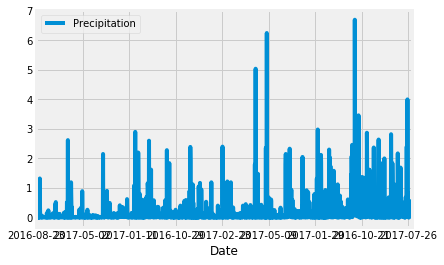

In [16]:
# Plot the DataFrame
precipitation_df.plot(x = "date", y = "prcp", kind = "line", label = "Precipitation")
plt.legend(loc="upper left")
plt.xlabel("Date")

![precipitation](Images/precipitation.png)

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_summary = session.query(Measurement.date, Measurement.prcp, Measurement.station, Measurement.id, Measurement.tobs).\
    filter(Measurement.date >= '2016-08-23').all()
precipitacion_summary_df = pd.DataFrame(precipitation_summary)
prcp = pd.DataFrame(precipitacion_summary_df.describe()['prcp'])
prcp

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# Design a query to show how many stations are available in this dataset?
stationCount = session.query(Station).count()
stationCount

9

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
ActiveStations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()   
ActiveStations

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temp = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
temp

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [21]:
#Getting the last obsevation
Last_Obs = session.query(Measurement.date,Measurement.tobs).filter(Measurement.station=='USC00519281').all()
Last_Obs_df = pd.DataFrame(Last_Obs)
Last_Obs_df.iloc[len(Last_Obs_df)-1,:]

date    2017-08-18
tobs            79
Name: 2771, dtype: object

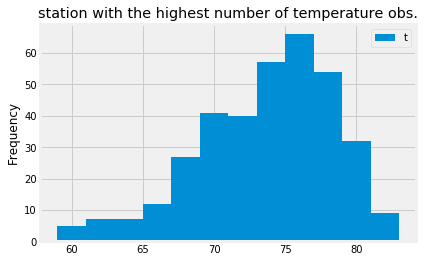

In [22]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
MaxStation = pd.DataFrame(session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= '2016-08-18').all())

x = MaxStation.iloc[:,1]
num_bins = 12
n, bins, patches = plt.hist(x, num_bins)
plt.title('station with the highest number of temperature obs.')
plt.legend('tobs', loc = 'upper right')
plt.ylabel("Frequency")
plt.show()